In [0]:
import numpy as np
import keras
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import  Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

import matplotlib.pyplot as plt
import itertools

In [0]:
#chargment des images
img_width, img_height = 300, 300
train_data_file = 'drive/My Drive/projetb/data/train'
validation_data_file = 'drive/My Drive/projetb/data/validation'
test_data_file = 'drive/My Drive/projetb/data/test'

train_batches= ImageDataGenerator().flow_from_directory(train_data_file, target_size=(img_width, img_height), classes=['clean','trash'], batch_size=80, shuffle=True)
valid_batches= ImageDataGenerator().flow_from_directory(validation_data_file, target_size=(img_width, img_height), classes=['clean','trash'], batch_size=20, shuffle=True)
test_batches= ImageDataGenerator().flow_from_directory(test_data_file, target_size=(img_width, img_height), classes=['clean','trash'], batch_size=20, shuffle=True)


Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [0]:
#Afficher images aléatoires

def plots(img, figsize=(300,300), rows=1, titles=None):
  if type (img[0]) is np.ndarray :
    img = np.array(img).astype(np.uint8)
    if (img.shape[-1]!=3):
      img= img.transpose(0,2,3,1)
  f = plt.figure(figsize=figsize)
  col= len(img)//rows if len(img) % 2 == 0 else len(img)//rows + 1
  for i in range(len(img)):
    sp=f.add_subplot(rows, col, i+1)
    if titles is not None :
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(img[i])


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


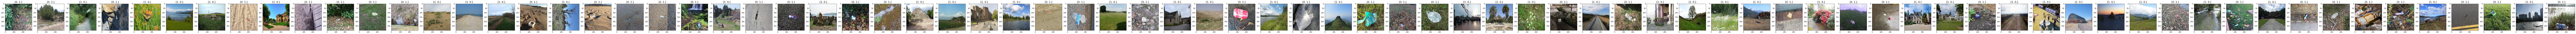

In [0]:
img , labels = next(train_batches)
plots(img, titles = labels)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3))) #prend 32 features en recherche 3*3 pixels


model.summary()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3))) #prend 32 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(300,300,3))) #prend 64 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(256, (3,3), activation='relu', input_shape=(300,300,3))) #prend 256 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()
#model.add(MaxPooling2D(pool_size=(2,2))) #recupe les datas utiles (les pixels les plus grands pour conserver les carastéristiques)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 296, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 146, 146, 64)      18496     
__________________________________

In [0]:
model.compile(Adam(lr=0.0001),loss ='categorical_crossentropy', metrics=['accuracy']) #learning rate 0.0001



In [0]:
model.fit_generator(
    train_batches,
    epochs=100,
    validation_data=valid_batches,
    verbose=1,
    )

Epoch 1/100
1/3 [=========>....................] - ETA: 28s - loss: 4.2243 - accuracy: 0.4500

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


2/3 [===================>..........] - ETA: 37s - loss: 89.4309 - accuracy: 0.4938

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


3/3 [==============================] - 115s 38s/step - loss: 108.1561 - accuracy: 0.4800 - val_loss: 27.0038 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 14s 5s/step - loss: 68.4328 - accuracy: 0.4900 - val_loss: 107.8108 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 14s 5s/step - loss: 88.4962 - accuracy: 0.5000 - val_loss: 39.2817 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 14s 5s/step - loss: 20.6459 - accuracy: 0.5600 - val_loss: 32.0824 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 14s 5s/step - loss: 36.6431 - accuracy: 0.5000 - val_loss: 25.2710 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 14s 5s/step - loss: 15.4951 - accuracy: 0.6000 - val_loss: 8.2843 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 14s 5s/step - loss: 8.0709 - accuracy: 0.5850 - val_loss: 19.0814 - val_accuracy: 0.5000
Epoch 8/100
3/3 [======

In [0]:
test_img , test_label = next(test_batches)
plots(test_img, titles= test_label)

test_label = test_label[:,0]
test_label

In [0]:
predictions = model.predict_generator(test_batches , verbose=1)
predictions
np.argmax(predictions, axis=1)

1/1 [==============================] - 1s 1s/step


array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [0]:
model.save_weights('try_1.h5')